In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim 
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
from torch.utils.data import DataLoader,Dataset
from sklearn.preprocessing import LabelEncoder,StandardScaler

/home/sjlee/miniconda3/envs/sj_virtual/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
train

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION X Unit Time_Dam,CURE END POSITION X Judge Value_Dam,...,Production Qty Collect Result_Fill2,Production Qty Unit Time_Fill2,Production Qty Judge Value_Fill2,Receip No Collect Result_Fill2,Receip No Unit Time_Fill2,Receip No Judge Value_Fill2,WorkMode Collect Result_Fill2,WorkMode Unit Time_Fill2,WorkMode Judge Value_Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,1,OK,240.0,NaN,NaN,...,7,NaN,NaN,127,NaN,NaN,1,NaN,NaN,Normal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,1,OK,240.0,NaN,NaN,...,185,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1,OK,1000.0,NaN,NaN,...,10,NaN,NaN,73,NaN,NaN,1,NaN,NaN,Normal
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1,OK,1000.0,NaN,NaN,...,268,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,1,OK,240.0,NaN,NaN,...,121,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3J1XF434-2,1,OK,240.0,NaN,NaN,...,318,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
40502,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1XC796-1,1,OK,1000.0,NaN,NaN,...,14,NaN,NaN,197,NaN,NaN,1,NaN,NaN,Normal
40503,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,4C1XD438-1,1,OK,240.0,NaN,NaN,...,1,NaN,NaN,27,NaN,NaN,1,NaN,NaN,Normal
40504,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3I1XA258-1,1,OK,1000.0,NaN,NaN,...,117,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal


In [4]:
# 절반 이상이 NaN인 데이터 column 드롭
drop_col = train.loc[:,(train.isna().sum(axis=0)>=len(train)/2).values].columns
train.drop(columns = drop_col,inplace = True)
train

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,...,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,1,OK,240.0,2.5,-90,...,50.0,91.8,270,50,114.612,19.9,7,127,1,Normal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,1,OK,240.0,2.5,-90,...,91.8,270.0,50,85,19.600,7.0,185,1,0,Normal
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1,OK,1000.0,12.5,90,...,50.0,91.8,270,50,114.612,19.8,10,73,1,Normal
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1,OK,1000.0,12.5,90,...,91.8,270.0,50,85,19.900,12.0,268,1,0,Normal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,1,OK,240.0,2.5,-90,...,91.8,270.0,50,85,19.700,8.0,121,1,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3J1XF434-2,1,OK,240.0,2.5,-90,...,91.8,270.0,50,85,19.200,1.0,318,1,0,Normal
40502,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1XC796-1,1,OK,1000.0,12.5,90,...,50.0,91.8,270,50,114.612,20.5,14,197,1,Normal
40503,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,4C1XD438-1,1,OK,240.0,2.5,-90,...,50.0,91.8,270,50,85.000,19.7,1,27,1,Normal
40504,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3I1XA258-1,1,OK,1000.0,12.5,90,...,91.8,270.0,50,85,20.100,13.0,117,1,0,Normal


In [5]:
train.isna().sum(axis=0).values

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0, 12766,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0, 12766,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [6]:
# 전부 다 다른 column과 전부 다 같은 column도 드롭
print(len(train.columns[(train.nunique()==1)|(train.nunique()==len(train))]))
train.drop(columns=train.columns[(train.nunique()==1)|(train.nunique()==len(train))],inplace=True)

35


In [7]:
train

,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,...,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2,target
0,Dam dispenser #1,AJX75334505,4F1XA938-1,240.0,2.5,-90,100,1030,-90,16,...,50.0,91.8,270,50,114.612,19.9,7,127,1,Normal
1,Dam dispenser #1,AJX75334505,3KPM0016-2,240.0,2.5,-90,70,1030,-90,10,...,91.8,270.0,50,85,19.600,7.0,185,1,0,Normal
2,Dam dispenser #2,AJX75334501,4E1X9167-1,1000.0,12.5,90,85,280,90,16,...,50.0,91.8,270,50,114.612,19.8,10,73,1,Normal
3,Dam dispenser #2,AJX75334501,3K1X0057-1,1000.0,12.5,90,70,280,90,10,...,91.8,270.0,50,85,19.900,12.0,268,1,0,Normal
4,Dam dispenser #1,AJX75334501,3HPM0007-1,240.0,2.5,-90,70,1030,-90,10,...,91.8,270.0,50,85,19.700,8.0,121,1,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,Dam dispenser #1,AJX75334501,3J1XF434-2,240.0,2.5,-90,70,1030,-90,10,...,91.8,270.0,50,85,19.200,1.0,318,1,0,Normal
40502,Dam dispenser #2,AJX75334501,4E1XC796-1,1000.0,12.5,90,100,280,90,16,...,50.0,91.8,270,50,114.612,20.5,14,197,1,Normal
40503,Dam dispenser #1,AJX75334501,4C1XD438-1,240.0,2.5,-90,100,1030,-90,16,...,50.0,91.8,270,50,85.000,19.7,1,27,1,Normal
40504,Dam dispenser #2,AJX75334501,3I1XA258-1,1000.0,12.5,90,70,280,90,10,...,91.8,270.0,50,85,20.100,13.0,117,1,0,Normal


In [8]:
train.loc[:,'Model.Suffix_Dam'].nunique()

7

In [9]:
# normal abnormal split
train_normal = train.loc[train['target']=='Normal']
train_abnormal = train.loc[train['target']=='AbNormal']
print(len(train_normal), len(train_abnormal))

38156 2350


In [10]:
normal_fill_col = train_normal.columns[train_normal.isna().sum(axis=0)>0]
abnormal_fill_col = train_abnormal.columns[train_abnormal.isna().sum(axis=0)>0]
print(normal_fill_col)
print(abnormal_fill_col)

Index(['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
       'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
       'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'],
      dtype='object')
Index(['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
       'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
       'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'],
      dtype='object')


In [11]:
no_agreement_col_list = train.columns[(train.applymap(lambda x: type(x).__name__).nunique()>1).values]
no_agreement_col_list

Index(['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
       'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
       'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'],
      dtype='object')

In [12]:
# 불일치 컬럼의 dtype 조사
# OK 부분이 잘못됐음
normal_condition = (train_normal.loc[:,no_agreement_col_list] != 'OK')
abnormal_condition = (train_abnormal.loc[:,no_agreement_col_list] != 'OK')

In [13]:
normal_replace_list = []
normal_replace_list.append(train_normal.loc[normal_condition.iloc[:,0],no_agreement_col_list[0]].dropna().astype('float').mean())
normal_replace_list.append(train_normal.loc[normal_condition.iloc[:,1],no_agreement_col_list[1]].dropna().astype('float').mean())
normal_replace_list.append(train_normal.loc[normal_condition.iloc[:,2],no_agreement_col_list[2]].dropna().astype('float').mean())

abnormal_replace_list = []
abnormal_replace_list.append(train_abnormal.loc[abnormal_condition.iloc[:,0],no_agreement_col_list[0]].dropna().astype('float').mean())
abnormal_replace_list.append(train_abnormal.loc[abnormal_condition.iloc[:,1],no_agreement_col_list[1]].dropna().astype('float').mean())
abnormal_replace_list.append(train_abnormal.loc[abnormal_condition.iloc[:,2],no_agreement_col_list[2]].dropna().astype('float').mean())

In [14]:
print(normal_replace_list)
print(abnormal_replace_list)

[464.46787612361396, 838.0957286267304, 719.0343481398859]
[474.2274461028193, 838.0704809286898, 733.007048092869]


In [15]:
train_normal.loc[:,no_agreement_col_list[0]] = train_normal.loc[:,no_agreement_col_list[0]].replace({'OK':normal_replace_list[0]})
train_normal.loc[:,no_agreement_col_list[1]] = train_normal.loc[:,no_agreement_col_list[1]].replace({'OK':normal_replace_list[1]})
train_normal.loc[:,no_agreement_col_list[2]] = train_normal.loc[:,no_agreement_col_list[2]].replace({'OK':normal_replace_list[2]})

train_abnormal.loc[:,no_agreement_col_list[0]] = train_abnormal.loc[:,no_agreement_col_list[0]].replace({'OK':abnormal_replace_list[0]})
train_abnormal.loc[:,no_agreement_col_list[1]] = train_abnormal.loc[:,no_agreement_col_list[1]].replace({'OK':abnormal_replace_list[1]})
train_abnormal.loc[:,no_agreement_col_list[2]] = train_abnormal.loc[:,no_agreement_col_list[2]].replace({'OK':abnormal_replace_list[2]})

In [16]:
# 결측치 평균으로 제거
train_normal.loc[:,no_agreement_col_list[0]].fillna(normal_replace_list[0],inplace=True)
train_normal.loc[:,no_agreement_col_list[1]].fillna(normal_replace_list[1],inplace=True)
train_normal.loc[:,no_agreement_col_list[2]].fillna(normal_replace_list[2],inplace=True)

train_abnormal.loc[:,no_agreement_col_list[0]].fillna(abnormal_replace_list[0],inplace=True)
train_abnormal.loc[:,no_agreement_col_list[1]].fillna(abnormal_replace_list[1],inplace=True)
train_abnormal.loc[:,no_agreement_col_list[2]].fillna(abnormal_replace_list[2],inplace=True)

/tmp/ipykernel_20121/2647696890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_normal.loc[:,no_agreement_col_list[0]].fillna(normal_replace_list[0],inplace=True)
/tmp/ipykernel_20121/2647696890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_normal.loc[:,no_agreement_col_list[1]].fillna(normal_replace_list[1],inplace=True)
/tmp/ipykernel_20121/2647696890.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_nor

In [17]:
train_normal.loc[:,no_agreement_col_list[0]] = train_normal.loc[:,no_agreement_col_list[0]].astype(float)
train_normal.loc[:,no_agreement_col_list[1]] = train_normal.loc[:,no_agreement_col_list[1]].astype(float)
train_normal.loc[:,no_agreement_col_list[2]] = train_normal.loc[:,no_agreement_col_list[2]].astype(float)

train_abnormal.loc[:,no_agreement_col_list[0]] = train_abnormal.loc[:,no_agreement_col_list[0]].astype(float)
train_abnormal.loc[:,no_agreement_col_list[1]] = train_abnormal.loc[:,no_agreement_col_list[1]].astype(float)
train_abnormal.loc[:,no_agreement_col_list[2]] = train_abnormal.loc[:,no_agreement_col_list[2]].astype(float)

In [18]:
print(train_normal.isna().sum().sum())
print(train_abnormal.isna().sum().sum())

0
0


In [19]:
train_normal.reset_index(inplace=True,drop=True)
train_abnormal.reset_index(inplace=True,drop=True)

# normal data를 이용한 AE학습

In [20]:
data = train_normal.copy()
data.drop(columns=['target'],inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38156 entries, 0 to 38155
Columns: 145 entries, Equipment_Dam to WorkMode Collect Result_Fill2
dtypes: float64(68), int64(62), object(15)
memory usage: 42.2+ MB


In [22]:
# label encoder로 categorical data 인코딩
lab_enc_dict = {}
scaler_dict = {}
for col in data:
    if data.loc[:,col].dtypes == np.object_:
        lab_enc = LabelEncoder()
        data[col] = lab_enc.fit_transform(data[col])
        lab_enc_dict[col] = lab_enc

In [23]:
data

,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,...,Head Clean Position Y Collect Result_Fill2,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2
0,0,3,655,240.0,2.5,-90,100,1030,-90,16,...,119,50.0,91.8,270,50,114.612,19.9,7,127,1
1,0,3,283,240.0,2.5,-90,70,1030,-90,10,...,50,91.8,270.0,50,85,19.600,7.0,185,1,0
2,1,0,587,1000.0,12.5,90,85,280,90,16,...,119,50.0,91.8,270,50,114.612,19.8,10,73,1
3,1,0,251,1000.0,12.5,90,70,280,90,10,...,50,91.8,270.0,50,85,19.900,12.0,268,1,0
4,0,0,142,240.0,2.5,-90,70,1030,-90,10,...,50,91.8,270.0,50,85,19.700,8.0,121,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38151,1,0,305,1000.0,12.5,90,70,280,90,10,...,119,50.0,91.8,270,50,85.000,20.7,16,232,1
38152,0,0,238,240.0,2.5,-90,70,1030,-90,10,...,50,91.8,270.0,50,85,19.200,1.0,318,1,0
38153,1,0,641,1000.0,12.5,90,100,280,90,16,...,119,50.0,91.8,270,50,114.612,20.5,14,197,1
38154,0,0,539,240.0,2.5,-90,100,1030,-90,16,...,119,50.0,91.8,270,50,85.000,19.7,1,27,1


In [27]:
scaler = StandardScaler()
class TensorDataset(Dataset):
    def __init__(self,x):
        x = x.values
        x = scaler.fit_transform(x)
        self.features = x
        self.targets = x
    def __len__(self):
        return self.features.shape[0]
    
    def __getitem__(self,idx):
        x = torch.FloatTensor(self.features[idx])
        y = torch.FloatTensor(self.features[idx])
        return x,y        

In [28]:
train_dataset = TensorDataset(data)
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)

In [29]:
next(iter(train_loader))[0].size()

torch.Size([32, 145])

In [30]:
class AutoEncoder(nn.Module):
    def __init__(self,feat_size):
        super().__init__()
        level1 = int(feat_size)
        level2 = int(feat_size/2)
        level3 = int(feat_size/4)
        level4 = int(feat_size/8)

        self.encoder = nn.Sequential(
                nn.Linear(level1,level2),
                nn.ReLU(),
                nn.Linear(level2,level3),
                nn.ReLU(),
                nn.Linear(level3,level4),
                nn.ReLU()
        )

        self.decoder = nn.Sequential(
                nn.Linear(level4,level3),
                nn.ReLU(),
                nn.Linear(level3,level2),
                nn.ReLU(),
                nn.Linear(level2,level1)
        )
    def forward(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [31]:
device = torch.device("cuda:0")
model = AutoEncoder(len(data.columns)).to(device)
epochs = 100
optimizer = torch.optim.Adam(model.parameters(),lr = 0.005)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.001)

criterion =  nn.MSELoss()

In [32]:
for epoch in range(epochs):
    model.train()
    running_loss=0.0
    for input,target in train_loader:
        input,target = input.to(device), target.to(device)
        output = model(input)

        loss = criterion(output,target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss+=loss.item()
    # 5 epoch scheduler
    scheduler.step()

    print(f"epoch:{epoch} Loss:{running_loss/len(input)}")        

epoch:0 Loss:11.918077981720367
epoch:1 Loss:5.072060716493676
epoch:2 Loss:4.147725737498452
epoch:3 Loss:3.313794356848424
epoch:4 Loss:3.2294370594124
epoch:5 Loss:2.003713288034002
epoch:6 Loss:1.835545126736785
epoch:7 Loss:1.7617765027098358
epoch:8 Loss:1.7188523224710177
epoch:9 Loss:1.6870863056198384
epoch:10 Loss:1.6747616758802906
epoch:11 Loss:1.6746367049248267
epoch:12 Loss:1.6739358615595847
epoch:13 Loss:1.673876193119213
epoch:14 Loss:1.6743119885989775
epoch:15 Loss:1.6756732689682394
epoch:16 Loss:1.6737094513761501
epoch:17 Loss:1.6739273758139461
epoch:18 Loss:1.674940062764411
epoch:19 Loss:1.6739713591523468
epoch:20 Loss:1.674652526853606
epoch:21 Loss:1.6738948834439118
epoch:22 Loss:1.6741477574687451
epoch:23 Loss:1.6739826663785304
epoch:24 Loss:1.674089487331609
epoch:25 Loss:1.6739710258164753
epoch:26 Loss:1.6738951737061143
epoch:27 Loss:1.6737065111131717
epoch:28 Loss:1.6743145789563034
epoch:29 Loss:1.6740590592380613
epoch:30 Loss:1.674111471278593


In [33]:
# 이 부분을 훈련 코드안으로 집어넣으려면?
valid_data = train_abnormal.copy()
valid_data.drop(columns = 'target',inplace = True)
valid_data

,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,...,Head Clean Position Y Collect Result_Fill2,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2
0,Dam dispenser #1,AJX75334502,4B1XA868-1,240.0,2.5,-90,70,1030,-90,16,...,119,50.0,91.8,270,50,85.000,19.4,3,77,6
1,Dam dispenser #2,AJX75334501,3J1XF461-1,1000.0,12.5,90,70,280,90,10,...,50,91.8,270.0,50,85,19.400,13.0,279,1,0
2,Dam dispenser #1,AJX75334505,4E1X9997-2,240.0,2.5,-90,85,1030,-90,16,...,119,50.0,91.8,270,50,114.612,20.8,3,237,1
3,Dam dispenser #1,AJX75334501,3M1XH386-1,240.0,2.5,-90,70,1030,-90,16,...,119,50.0,91.8,270,50,85.000,19.6,4,179,1
4,Dam dispenser #1,AJX75334501,3K1XB239-1,240.0,2.5,-90,70,1030,-90,10,...,119,50.0,91.8,270,50,85.000,19.6,6,94,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,Dam dispenser #1,AJX75334501,4B1XE009-1,240.0,2.5,-90,70,1030,-90,16,...,119,50.0,91.8,270,50,85.000,19.3,1,9,1
2346,Dam dispenser #1,AJX75334501,3G1XC632-1,240.0,2.5,-90,70,1030,-90,10,...,50,91.8,270.0,50,85,18.900,8.0,60,1,0
2347,Dam dispenser #2,AJX75334502,3K1X7331-1,1000.0,12.5,90,70,280,90,10,...,50,91.8,270.0,50,85,19.800,11.0,164,1,0
2348,Dam dispenser #1,AJX75334501,3G1XA615-2,240.0,2.5,-90,70,1030,-90,10,...,50,91.8,270.0,50,85,19.200,1.0,252,1,0


In [34]:
~np.isin(np.array([1,2,3]),np.array([2,3,4,5,6]))

array([ True, False, False])

In [35]:
for col in valid_data:
    if valid_data.loc[:,col].dtypes == np.object_:
        lab_enc = lab_enc_dict[col]
        try:
            valid_data[col] = lab_enc.fit_transform(valid_data[col])
        except:
            new_data = valid_data[col].values.reshape(-1)
            classes = lab_enc.classes_
            # 존재하지 않는 것을 찾음
            condition = ~np.isin(new_data,classes)
            add_item = new_data[condition]
            new_classes = np.concatenate(classes,add_item)
            lab_enc.classes_ = new_classes
            lab_enc_dict[col] = lab_enc
            valid_data[col] = lab_enc.fit_transform(valid_data[col])
    

In [36]:
def ReconstructionError(pred,target):
    # input size = (len of samples, feature size) = target_size
    return ((pred-target)**2).sum(axis=1)

In [37]:
valid_tensor = torch.FloatTensor(scaler.transform(valid_data.values)).to(device)
pred = model(valid_tensor)
target = deepcopy(valid_tensor)

In [38]:
Error = ReconstructionError(pred,target)
Error

tensor([9.2861, 3.5942, 4.6094,  ..., 1.8025, 1.0912, 1.3127], device='cuda:0',
       grad_fn=<SumBackward1>)

In [39]:
Error = Error.to('cpu').detach().numpy()
Error

array([9.286123 , 3.594152 , 4.6093597, ..., 1.8024751, 1.0912268,
       1.3127052], dtype=float32)

In [40]:
print(Error.max())
# max값은 이상치 이를 빼고 그리자
removed_error = Error[Error<Error.max()]
removed_error

28463.074


array([9.286123 , 3.594152 , 4.6093597, ..., 1.8024751, 1.0912268,
       1.3127052], dtype=float32)

<Axes: >

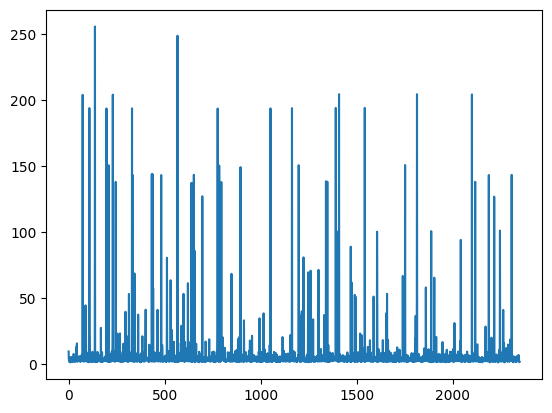

In [41]:
sns.lineplot(removed_error)

In [42]:
pd.DataFrame(removed_error).describe()

,0
count,2349.000000
mean,7.507669
std,22.054436
min,0.938975
25%,2.082524
50%,2.990192
75%,5.020042
max,255.582001


In [55]:
threshold = removed_error.min()
threshold

0.938975

# Test Set 성능 측정

In [44]:
test = pd.read_csv('./data/test.csv')
test = test[valid_data.columns]
test

,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,...,Head Clean Position Y Collect Result_Fill2,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2
0,Dam dispenser #2,AJX75334501,3J1XF767-1,1000.0,12.5,90,70,280,90,10,...,50,91.8,270.0,50,85,19.8,13.0,195,1,0
1,Dam dispenser #2,AJX75334501,4B1XD472-2,1000.0,12.5,90,70,280,90,16,...,119,50.0,91.8,270,50,85.0,19.8,14,256,1
2,Dam dispenser #1,AJX75334501,3H1XE355-1,240.0,2.5,-90,70,1030,-90,10,...,50,91.8,270.0,50,85,19.7,1.0,98,1,0
3,Dam dispenser #2,AJX75334501,3L1XA128-1,1000.0,12.5,90,70,280,90,10,...,119,50.0,91.8,270,50,85.0,20.0,14,0,1
4,Dam dispenser #1,AJX75334501,4A1XA639-1,240.0,2.5,-90,70,1030,-90,16,...,119,50.0,91.8,270,50,85.0,19.8,1,215,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17356,Dam dispenser #2,AJX75334501,3K1XB597-1,1000.0,12.5,90,70,280,90,10,...,119,50.0,91.8,270,50,85.0,19.5,14,131,1
17357,Dam dispenser #2,AJX75334501,4A1XB974-1,1000.0,12.5,90,70,280,90,16,...,119,50.0,91.8,270,50,85.0,19.8,12,279,1
17358,Dam dispenser #1,AJX75334501,3L1XA998-1,240.0,2.5,-90,70,1030,-90,16,...,119,50.0,91.8,270,50,85.0,20.5,4,66,1
17359,Dam dispenser #1,AJX75334501,3F1XC376-1,240.0,2.5,-90,70,1030,-90,10,...,50,91.8,270.0,50,85,18.9,1.0,117,1,0


In [45]:
valid_data.columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [46]:
for col in test:
    if test.loc[:,col].dtypes == np.object_:
        lab_enc = lab_enc_dict[col]
        try:
            test[col] = lab_enc.fit_transform(test[col])
        except:
            new_data = test[col].values.reshape(-1)
            classes = lab_enc.classes_
            # 존재하지 않는 것을 찾음
            condition = ~np.isin(new_data,classes)
            add_item = new_data[condition]
            new_classes = np.concatenate(classes,add_item)
            lab_enc.classes_ = new_classes
            lab_enc_dict[col] = lab_enc
            test[col] = lab_enc.fit_transform(test[col])
    

In [47]:
test_data = torch.FloatTensor(scaler.transform(test.values)).to(device)
target = deepcopy(test_data)
pred = model(test_data)

In [48]:
pred.size()

torch.Size([17361, 145])

In [49]:
Recon_Error = ReconstructionError(pred,target)
Recon_Error = Recon_Error.detach().to('cpu').numpy()
Recon_Error

array([ 2.5615196, 18.370537 ,  5.488611 , ..., 34.496483 ,  4.704793 ,
        5.605345 ], dtype=float32)

In [56]:
(Recon_Error<threshold).sum()

244

In [57]:
result = np.where(Recon_Error<=threshold,'Normal','AbNormal')
result

array(['AbNormal', 'AbNormal', 'AbNormal', ..., 'AbNormal', 'AbNormal',
       'AbNormal'], dtype='<U8')

In [58]:
submission = pd.read_csv('./data/submission.csv')
submission

,Set ID,target
0,0001be084fbc4aaa9d921f39e595961b,Normal
1,0005bbd180064abd99e63f9ed3e1ac80,AbNormal
2,000948934c4140d883d670adcb609584,Normal
3,000a6bfd02874c6296dc7b2e9c5678a7,AbNormal
4,0018e78ce91343678716e2ea27a51c95,AbNormal
...,...,...
17356,ffea508b59934d689b540f95eb3fa730,AbNormal
17357,ffed8923c8a448a98afc641b770be153,AbNormal
17358,fff1e73734da40adbe805359b3efb462,AbNormal
17359,fff8e38bdd09470baf95f71e92075dec,Normal


In [59]:
submission['target'] = result

In [60]:
submission.to_csv('./data/submission.csv',index=False)